In [7]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Customers.csv')
df1=pd.read_csv('Transactions.csv')

In [4]:
data = pd.merge(df, df1, on='CustomerID', how='inner')

In [5]:
data.head()

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 09:01:18,3,412.62,137.54
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 00:01:00,2,614.94,307.47
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 03:11:44,2,911.44,455.72
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64


In [14]:
data.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   object 
 1   CustomerName     1000 non-null   object 
 2   Region           1000 non-null   object 
 3   SignupDate       1000 non-null   object 
 4   TransactionID    1000 non-null   object 
 5   ProductID        1000 non-null   object 
 6   TransactionDate  1000 non-null   object 
 7   Quantity         1000 non-null   int64  
 8   TotalValue       1000 non-null   float64
 9   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(7)
memory usage: 78.3+ KB


In [17]:
data.shape

(1000, 10)

In [20]:
data['SignupDate']=pd.to_datetime(data['SignupDate'])
data['TransactionDate']=pd.to_datetime(data['TransactionDate'])

In [21]:
data.head()

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 09:01:18,3,412.62,137.54
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 00:01:00,2,614.94,307.47
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 03:11:44,2,911.44,455.72
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64


In [88]:
from sklearn.preprocessing import StandardScaler
numerical_features = data.select_dtypes(include=['number']).columns
clustering_data = data[numerical_features]
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

In [90]:
k_values = range(2, 10)
db_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(clustering_data_scaled)
    db_score = davies_bouldin_score(clustering_data_scaled, cluster_labels)
    db_scores.append(db_score)

optimal_k = k_values[db_scores.index(min(db_scores))]
print(f"Optimal number of clusters (k): {optimal_k}")

Optimal number of clusters (k): 9


In [91]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(clustering_data_scaled)

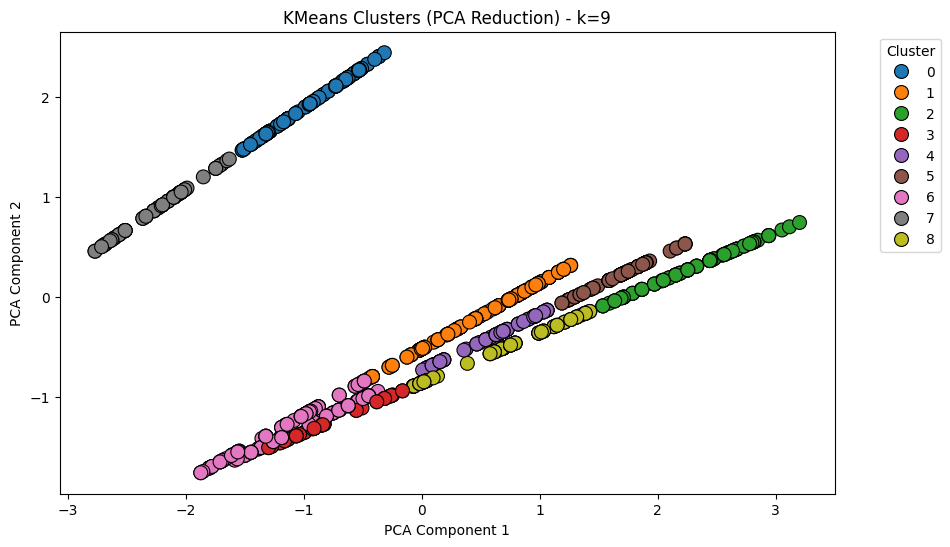

In [92]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(clustering_data_scaled)
pca_result_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
pca_result_df['Cluster'] = cluster_labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_result_df, palette='tab10', s=100, edgecolor='black', marker='o')
plt.title(f'KMeans Clusters (PCA Reduction) - k={optimal_k}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [94]:
from sklearn.metrics import davies_bouldin_score
db_score = davies_bouldin_score(clustering_data_scaled, cluster_labels)
print(f"Overall Davies-Bouldin Index: {db_score}")
unique_clusters = np.unique(cluster_labels)
for cluster in unique_clusters:
    cluster_data = clustering_data_scaled[cluster_labels == cluster]


Overall Davies-Bouldin Index: 0.5286943349679493


**Overall Davies-Bouldin Index: 0.5286943349679493**





In [95]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

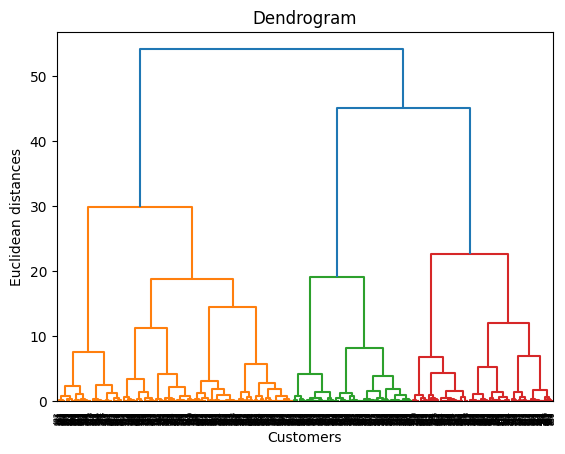

In [96]:
dendrogram = sch.dendrogram(sch.linkage(clustering_data_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()
hc = AgglomerativeClustering(n_clusters=8, linkage='ward')
y_hc = hc.fit_predict(clustering_data_scaled)

In [97]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(clustering_data_scaled, y_hc)
print(f"Davies-Bouldin Index: {db_score}")

Davies-Bouldin Index: 0.6521208498821581


**Davies-Bouldin Index: 0.6521208498821581**

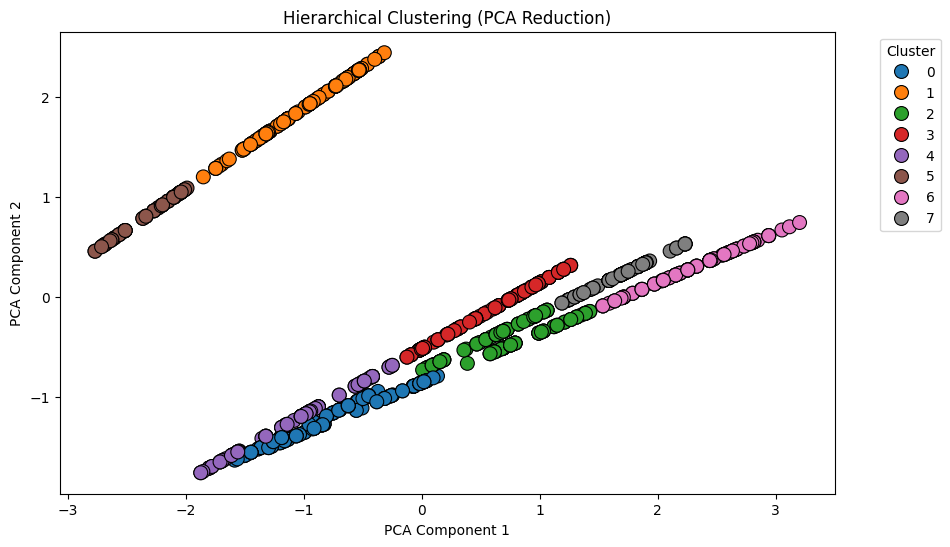

In [98]:
pca = PCA(n_components=2)
pca_result_hc = pca.fit_transform(clustering_data_scaled)
pca_result_hc_df = pd.DataFrame(pca_result_hc, columns=['PCA1', 'PCA2'])
pca_result_hc_df['Cluster'] = y_hc
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_result_hc_df, palette='tab10', s=100, edgecolor='black', marker='o')
plt.title('Hierarchical Clustering (PCA Reduction)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()